In [1]:
import numpy as np
import torch
import torchvision
import json
from torchvision.io import read_image
import os
import cv2
import matplotlib.pyplot as plt
from random import randrange

In [2]:
class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, annotation_path, transforms=None):
        self.image_dir = image_dir
        self.transforms = transforms
        self.imgs = list(sorted(os.listdir(os.path.join(image_dir))))
        with open(annotation_path) as json_file:
            annotation_list = json.load(json_file)
        self.annotation_list = annotation_list

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.imgs[idx])
        label_bbox = self.annotation_list[idx]['bbox']
        img = read_image(img_path).to(torch.float32)
        # Pascal VOC / original annotation is COCO
        boxes = [label_bbox[0], label_bbox[1], label_bbox[0]+label_bbox[2], label_bbox[1]+label_bbox[3]]
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        category = torch.as_tensor((self.annotation_list[idx]['category_id'],), dtype=torch.int8)
        image_id = torch.tensor([idx])
        target = {}
        target["boxes"] = boxes
        target["category"] = category
        target["image_id"] = image_id
        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [3]:
train_dataset = CustomImageDataset('./images/train', annotation_path="./images/train_annotations", transforms=None)
category_dict = {1:"penguin", 2:"turtle"}

In [4]:
number = str(randrange(len(train_dataset)+1)).zfill(3)
annotation = train_dataset[int(number)]
bbox = annotation[1]['boxes'].tolist()
image = cv2.imread('./images/train/image_id_'+number+'.jpg')
category = category_dict[annotation[1]["category"].tolist()[0]]
start = (int(bbox[0]) ,int(bbox[1]))
end = (int(bbox[2]), int(bbox[3]))
color = (255, 0, 0)
thickness = 5
cv2.rectangle(image, start, end, color, thickness)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

(-0.5, 639.5, 639.5, -0.5)

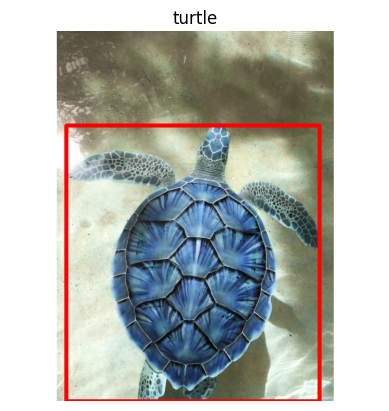

In [5]:
fig, axes = plt.subplots(1, 1)
axes.imshow(image) 
axes.set_title(category)
axes.axis('off')

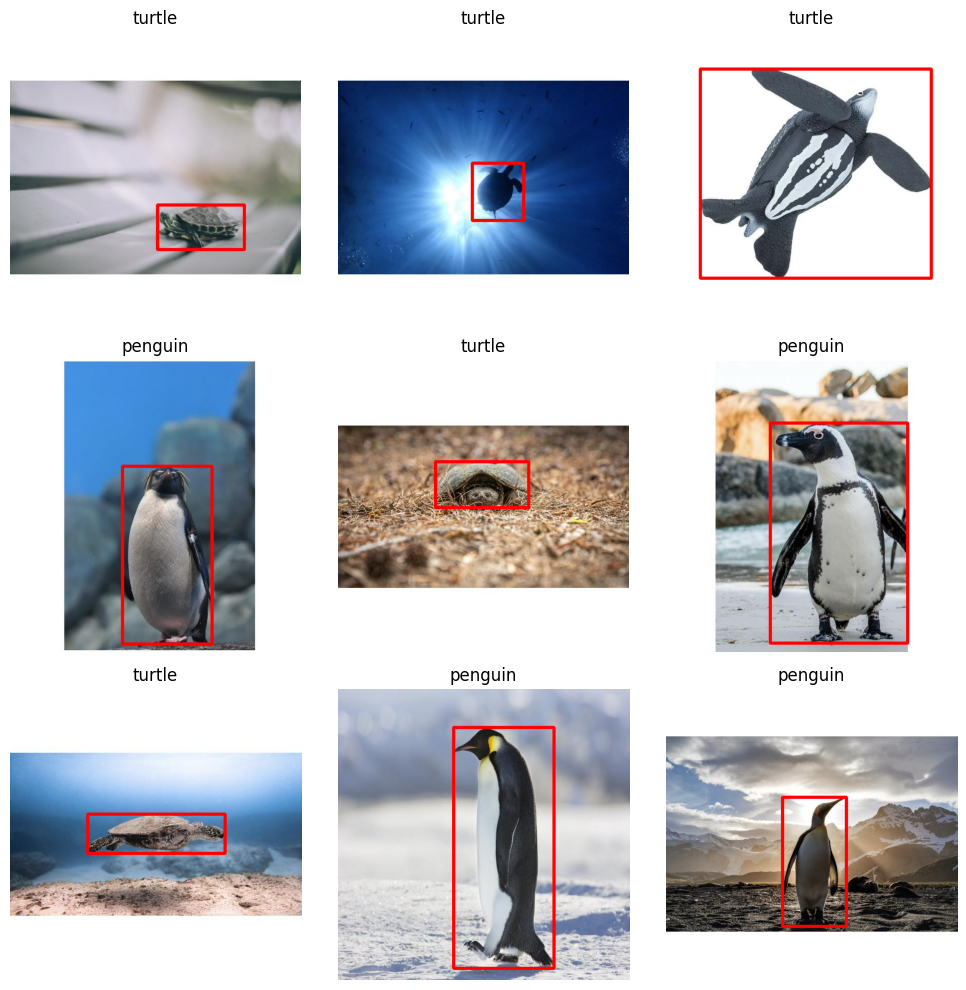

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        # random index
        number = str(randrange(len(train_dataset) + 1)).zfill(3)
        annotation = train_dataset[int(number)]
        bbox = annotation[1]['boxes'].tolist()  
        image_path = './images/train/image_id_' + number + '.jpg'
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
        category = category_dict[annotation[1]["category"].tolist()[0]]
        start = (int(bbox[0]), int(bbox[1]))
        end = (int(bbox[2]), int(bbox[3]))
        color = (255, 0, 0)
        thickness = 5
        # draw bbox
        cv2.rectangle(image, start, end, color, thickness)
        # display
        axes[i, j].imshow(image)
        axes[i, j].set_title(category)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()